In [1]:
import pickle
import umap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from tqdm.auto import trange
from sklearn.decomposition import PCA

# from src.SlovotvirModel import (run_model)
from src.SlovotvirModelM import (run_model_parallel)
# run_model,

In [2]:
N = 100

In [ ]:
neutral = run_model_parallel([0] * N, [1] * N, np.random.lognormal(0, 0.5, N), N)
length_bias = run_model_parallel([10] * N, [1] * N, np.random.lognormal(0, 0.5, N), N)
like_bias = run_model_parallel([0] * N, [10] * N, np.random.lognormal(0, 0.5, N), N)

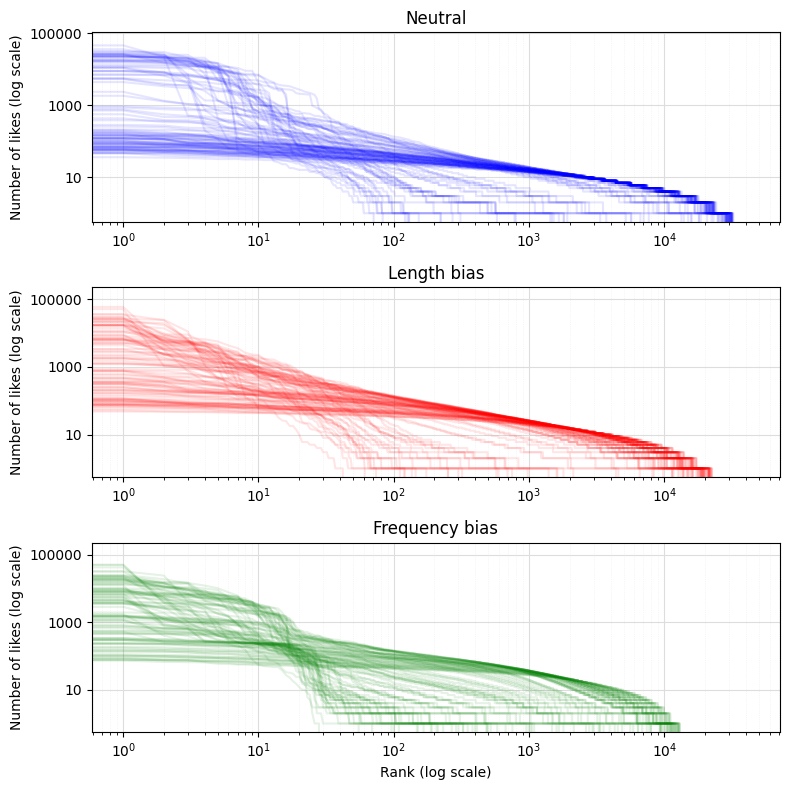

In [13]:
# PLOT THE RANK LIKES
fig, axs = plt.subplots(3, 1, figsize=(8, 8))  # Create 3 subplots

# Plot Neutral bias
for i in range(100):
    axs[0].plot(neutral[i], c='b', alpha=0.1, label='Neutral')
# axs[0].set_xlabel('Rank (log scale)')
# set title
axs[0].set_title('Neutral')
axs[0].set_ylabel('Number of likes (log scale)')
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].yaxis.set_major_formatter(mticker.ScalarFormatter())
axs[0].grid(which='major', color='#DDDDDD', linewidth=0.8)
axs[0].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

# Plot Length bias
for i in range(100):
    axs[1].plot(length_bias[i], c='r', alpha=0.1, label='Length bias')
# axs[1].set_xlabel('Rank (log scale)')
axs[1].set_title('Length bias')
axs[1].set_ylabel('Number of likes (log scale)')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].yaxis.set_major_formatter(mticker.ScalarFormatter())
axs[1].grid(which='major', color='#DDDDDD', linewidth=0.8)
axs[1].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

# Plot Like bias
for i in range(100):
    axs[2].plot(like_bias[i], c='g', alpha=0.1, label='Like bias')
axs[2].set_title('Frequency bias')
axs[2].set_xlabel('Rank (log scale)')
axs[2].set_ylabel('Number of likes (log scale)')
axs[2].set_yscale('log')
axs[2].set_xscale('log')
axs[2].yaxis.set_major_formatter(mticker.ScalarFormatter())
axs[2].grid(which='major', color='#DDDDDD', linewidth=0.8)
axs[2].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.1)
# Show the plot
plt.tight_layout()
plt.show()

In [6]:
# Combine the datasets
combined_data = np.concatenate((neutral, 
                                length_bias, 
                                like_bias), axis=0)
labels = np.concatenate((np.zeros(N), np.ones(N), np.ones(N)*2), axis=0)

In [7]:
# Perform UMAP on the combined dataset
umap_model = umap.UMAP(n_components=2)
combined_umap = umap_model.fit_transform(combined_data)

In [8]:
# perform pca
pca = PCA(n_components=2)
combined_pca = pca.fit_transform(combined_data)

In [9]:
# labels.shape

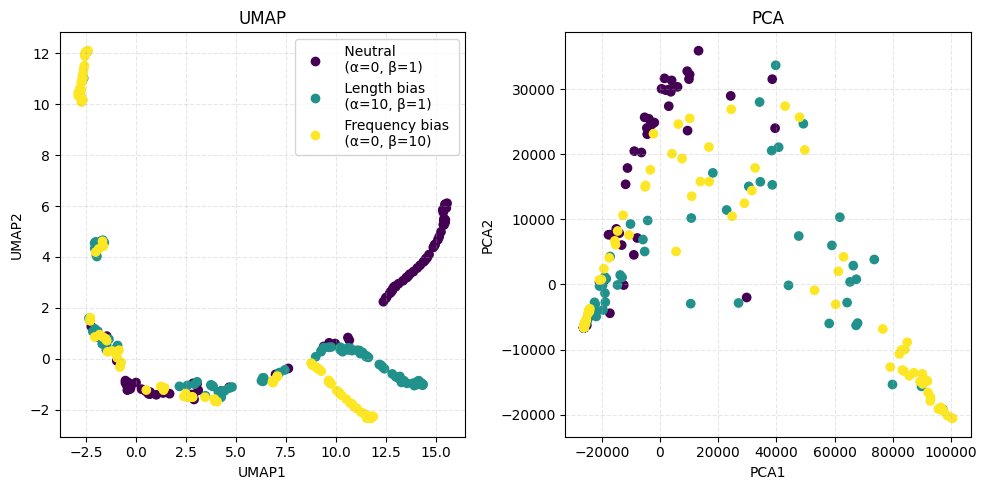

In [10]:
# plot pca results with labels 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# UMAP subplot
scatter_umap = axs[0].scatter(combined_umap[:3000, 0], combined_umap[:3000, 1], c=labels[:3000], cmap='viridis')
axs[0].set_xlabel('UMAP1')
axs[0].set_ylabel('UMAP2')
# add legend with labels matching the 4 colors
legend_labels = [' Neutral \n (α=0, β=1)', ' Length bias \n (α=10, β=1)', ' Frequency bias \n (α=0, β=10)']
axs[0].legend(handles=scatter_umap.legend_elements()[0], labels=legend_labels)
axs[0].grid(True, alpha=0.3, linestyle='--')
axs[0].set_title('UMAP')

# PCA subplot
scatter_pca = axs[1].scatter(combined_pca[:3000, 0], combined_pca[:3000, 1], c=labels[:3000], cmap='viridis')
axs[1].set_xlabel('PCA1')
axs[1].set_ylabel('PCA2')
# add legend with labels matching the 4 colors
# axs[1].legend(handles=scatter_pca.legend_elements()[0], labels=legend_labels)
axs[1].grid(True, alpha=0.3, linestyle='--')
axs[1].set_title('PCA')

plt.tight_layout()
plt.show()

/var/folders/1c/pphtjl397rnbdcp94xmwzkqr0000gn/T/ipykernel_9637/914567423.py:34: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


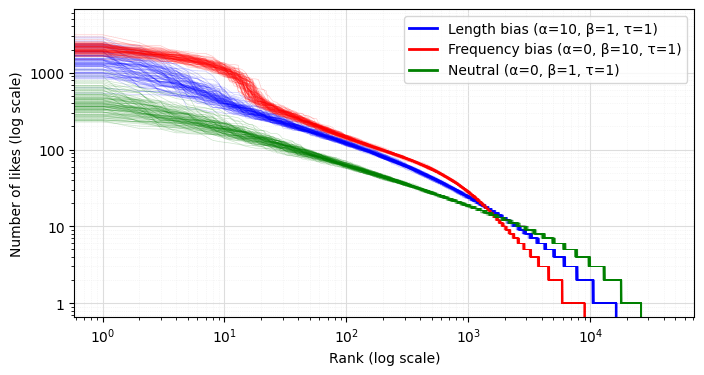

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
# for _ in range(100):
        # likes_model = run_model((10, 1, 1))
likes_model = run_model_parallel([10] * 100, [1] * 100, [1] * 100, 100)
for i in likes_model:
        plt.plot(range(len(i)), 
                i, 
                color='blue', 
        linewidth=0.5, alpha=0.2, label='Length bias (α=10, β=1, τ=1)')
# for _ in range(100):
        # likes_model = run_model((0, 10, 1))
likes_model = run_model_parallel([0] * 100, [10] * 100, [1] * 100, 100)
for i in likes_model:
        plt.plot(range(len(i)), 
                i, 
                color='red', 
                linewidth=0.5, alpha=0.2, label='Frequency bias (α=0, β=10, τ=1)')
# for _ in range(100):
        # likes_model = run_model((0, 1, 1))
likes_model = run_model_parallel([0] * 100, [1] * 100, [1] * 100, 100)
for i in likes_model:
        plt.plot(range(len(i)), 
                i, 
                color='green', 
                linewidth=0.5, alpha=0.2, label='Neutral (α=0, β=1, τ=1)')
ax.set_xlabel('Rank (log scale)')
ax.set_ylabel('Number of likes (log scale)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = plt.legend(by_label.values(), by_label.keys())
for lh in legend.legendHandles: 
    lh.set_alpha(1)
    lh.set_linewidth(2)
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
# save to pdf
plt.savefig('figures/model_prior.pdf', bbox_inches='tight')
plt.show()

/var/folders/1c/pphtjl397rnbdcp94xmwzkqr0000gn/T/ipykernel_9637/3052381478.py:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


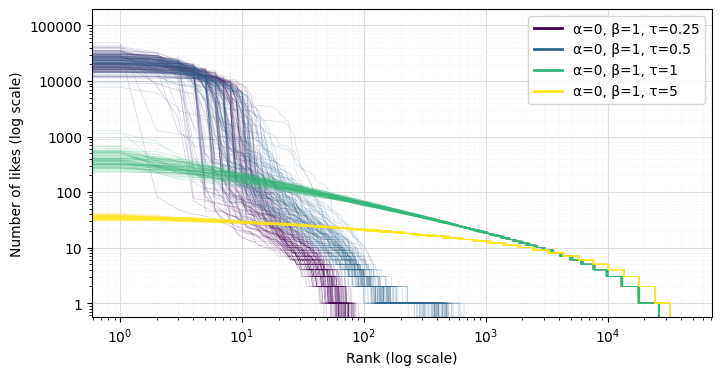

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
colors = plt.cm.viridis(np.linspace(0, 1, 4))
for i, tau in enumerate([0.25, 0.5, 1, 5]):
    color = colors[i]  # Get a unique color for each tau value
    likes_model = run_model_parallel([0] * 100, [1] * 100, [tau] * 100, 100) 
    for i in likes_model:
        plt.plot(range(len(i)), 
                i, 
                label=f'α=0, β=1, τ={tau}', 
                linewidth=0.5, 
                alpha=0.2,
                color=color)  # Assign unique color to each tau value

ax.set_xlabel('Rank (log scale)')
ax.set_ylabel('Number of likes (log scale)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = plt.legend(by_label.values(), by_label.keys())
for lh in legend.legendHandles: 
    lh.set_alpha(1)
    lh.set_linewidth(2)
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.savefig('figures/model_prior_tau.pdf', bbox_inches='tight')
plt.show()